# Empalme con la clase 15


## Clasificacion multiclase.
Hasta el dia de hoy nos hemos enfocado en problemas binarios
* Perro contra gato
* Cancer contra no cancer
* si contra no
* rojo contra azul.
* Etc.

Pero la clasificacion es algo mas general. Que tal que tengamos
por ejemplo perros, gatos y elefantes.

Voy a explicar tres tecnicas para clasificar multiclase (3 o mas)

* La funcion **softmax**
* one-hot encoding (codificacion del uno caliente)
* one-vs-all (uno contra todos, uno contra el resto, one-vs-rest).



## Funcion Softmax (activacion)
  \begin{eqnarray*}
    h(\theta,x) = \begin{pmatrix}
      P(y=1 | x ; \theta) \\
      P(y=2 | x ; \theta) \\
      \vdots \\
      P(y=K | x ; \theta) \\
    \end{pmatrix}
    =
    \begin{pmatrix}
      \sigma(z_1) \\
      \sigma(z_2) \\
      \vdots \\
      \sigma(z_K) \\
    \end{pmatrix}
    =
    \frac{1}{\sum_{j=1}^K \mathrm{exp}({\theta^{(j)}}^T x)}
    \begin{pmatrix}
      \mathrm{exp}({\theta^{(1)}}^T x) \\
      \mathrm{exp}({\theta^{(2)}}^T x) \\
      \vdots \\
      \mathrm{exp}({\theta^{(K)}}^T x) \\
    \end{pmatrix} ,
  \end{eqnarray*}


Esta funcion de $\mathbb{R}^k \to [0,1]^K$

\begin{eqnarray}
\sigma : \mathbb{R}^K &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)}
\end{eqnarray}

Esta funcion es una generalizacion de la logistic sigmoid $S$.
Es mas cuando $K=2$ es exactamente la sigmoid (se deja como prueba al estudiante).

Como en todo lo que hemos hecho tenemos tres pasos importantes:

1. Definir la hipoteis (ya esta)
2. Encontrar la funcion de costo (next)
3. Encontrar el gradiente de la funcion de costo.

Paso 2. Como encontrar la funcion de costo.

De la misma forma que en la clase anterior se siguen los siguientes pasos:

* Escribir una funcion de probabilidad multidimensional para cada muestra.
* Extender el problema a todas las muestras econtrando el **likelihood** (verosimilitud). Como las muestras son independientets. Resulta que la probabilidad conjunta de todos los datos es una doble productoria sobre las muestras $m$ y las clases $K$.

* Como una doble productoria es algo complicado para optimizar, se toma el logaritmo, que vuelve los productos en sumas.
* Se niega el signo para que en vez de maximizacion sea minimizacion.  El resultado es:


$$J(\theta) = -  \left [ \sum_{i=1}^m \sum_{k=1}^K
\mathbb{1} [ y^{(i)} = k ] \log \frac{\exp \left (  {\theta^{(k)}}^T x^{(i)} \right ) }{\sum_{j=1}^K \exp \left ( {\theta^{(j)}}^T x^{(i)}  \right )}
    \right ]  $$


donde

\begin{eqnarray}
\mathbb{1} \{ x \} =
\left \{
    \begin{array}{cc}
    1 & \text{ si } x \text{ es verdad} \\
    0 & \text{ en caso contrario}
    \end{array}
    \right .
\end{eqnarray}


El gradiente de la funcion de costo esta dado por

$$\nabla_{\theta} J(\theta) = -\sum_{i=1}^m x^{(i)}
\left (  \mathbb{1}[y^{(i)} = k] - p( y^{(i)}= k | x^{(i)}; \theta  \right ) $$


## One-hot encoding:
Ejemplo. Se tienen tres clases "gatos", "perros" , "cerdos".
Se pueden codificar como sigue.

\begin{eqnarray}
y^{(1)} = (1, 0, 0)^T \quad , \quad \text{para gatos} \\
y^{(2)} = (0, 1, 0)^T \quad , \quad \text{para perros} \\
y^{(3)} = (0, 0, 1)^T \quad , \quad \text{para cerdos}
\end{eqnarray}

En la hipotesis $h(\theta, x) = S( x^T \theta)$
Aca explico por que uso mayusculas para $X, \Theta, Y$.
El $Y$ es una matriz de tres columnas, $y^{(i)}, i=1,2,3$
El argumento de la hipotesis es:

$$ X \Theta = Y  \quad, \quad X \in \mathbb{R}^{m \times n} \quad , \Theta \in \mathbb{R}^{n \times 3} \quad , \quad Y \in \mathbb{R}^{m \times 3} $$
En general si tenemos $K$ clases podemos, para cada clase $i=1,2, \cdots, K$
escribir

$$X \Theta_i = Y_i \quad, \quad i=1, \cdots, k, $$



## One-vs-All (uno contra todos), uno contra el resto


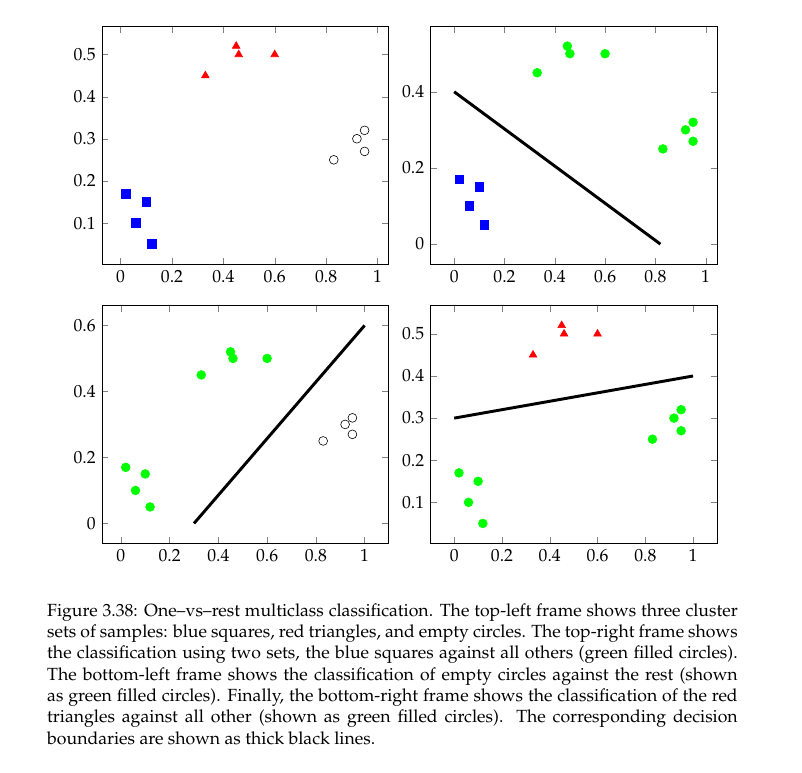

En este ejemplo la idea es escoger el $h(\theta, x)$ optimo como


$$h(\theta, x) = \max \{  h_1(\theta,x), h_2(\theta,x), h_3(\theta, x) \}  $$

En general

$$h(\theta, x) = \max_{i=1}^K h^{(i)}(\theta, x)  $$

# Evaluacion de los resultados: Analisis de la precision en la clasificacion.

## La matriz de confusion.

### Introduccion
Pensemos en el problema de 1494 mujeres y queremos determinar quienes estan o no en embarazo.

Veamos una figura.

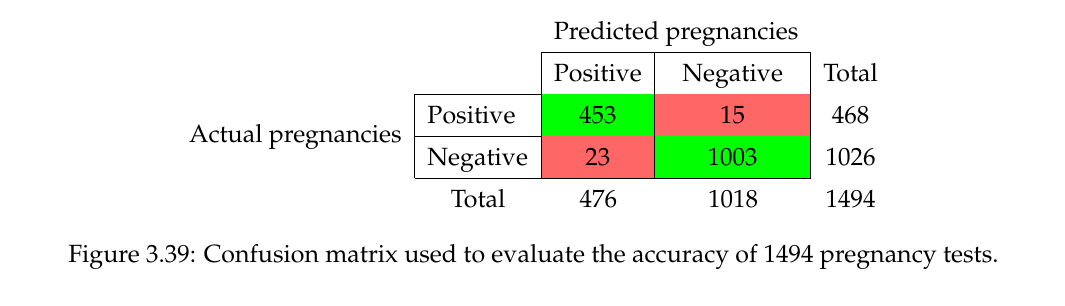

En esta matriz $L$ con elementos $\ell_{ij}$, $i=1,2, j=1,2$
Tenemos

* $\ell_{11}$: La mujer esta en embarazo y se predice que esta embarazo. Se llama un TP (True Positive)
* $\ell_{12}$: Se predice que no esta en embarzo pero si lo esta. FN=Falso negativo
* $\ell_{21}$: No esta en embarazo pero se predice que esta en embarazo FP=Falso positivo
* $\ell_{22}$: No esta en embarazo y se predice que no esta en embarzo TN.

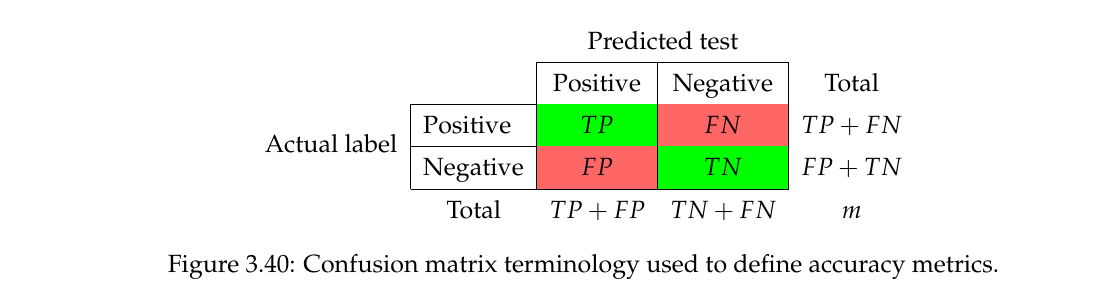

Todas las **metricas** que vamos a definir estan basadas en esta matriz que se llama
[matriz de confusion](https://stats.stackexchange.com/questions/164910/what-is-the-origin-of-the-term-confusion-matrix).


* **accuracy** (exactitud)


$$\text{accuracy} = \frac{TP+TN}{TP+TN+FP+FN}= \frac{TP + TN}{m} $$
Es la suma de la diagonal dividida por el total de muestras.

**la diagonal son buenas noticias**.

El complemento de accuracy es

* **missclassification rate** (rata de clasificacion errada)

$$\text{missclassification rate} = 1 - \text{accuracy} = \frac{FP + FN}{m} $$

Puede ser incomodo crear la matriz confusion, pero hay metodos en `sklearn` practicos para esto



In [1]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

tn,fp,fn,tp = confusion_matrix(y_true, y_pred).ravel()
print(f"tn={tn}, fp={fp}, fn={fn}, tp={tp}")

tn=3, fp=3, fn=2, tp=4


**Ejemplo 1**: Un instituto de investigacion corre un programa de ML para detectar diabetes en $m$ pacientes. La salida es $+$ si es diabetico y $-$ si no lo es. Vamos a analizar las cuatro posibilidades.

* TP(True Positive): La prediccion es "+" y el paciente es diabetico. Esto es bueno, aunque no sean buenas noticias.

* TN (True Negative): La prediccion es "-" y el paciente es aliviado. El mejor de los resultados, desde el punto de vista humano y de ML.

* FP (False positive): La prediccion es "+" pero el paciente esta aliviado. Falsa alarma.

* FN (False negative): La prediccion es "-" (esta alivado) pero no, esta enfermo. El paciente puede seguir consumiento azucar y muriendo lentamente. Peor si es cancer.  Esta el peor resultado desde el punto de vista humano y de ML.





**Ejemplo 2**: Asuma que un programa de ML funciona para detectar spam (correo basura).

* TP (True positive): El programa predice que el correo es basura y es basura. Bueno, por que lo manda a la carpeta de la basura y uste ni lo ve.

* TN (True Negative): El email se predice como legitimo (no spam) y no es spam. Lo a ver y revisar.

* FP (False positive): Se predice como spam pero no lo es.
Malo por que puede ser un cliente de la companhia muy importante.
El Spam detector se lo mando al "spam" (basura) y se perdio un negocio importante para la companhia. Queda despedido.

* FN (Falso negativo): Se predice como bueno pero es spam. Lo ve sin querer verlo. Le toca borrarlo manualmente.


# Proxima clase:
* Ejemplo de fraude bancario
* Otras metricas.
* La matriz de confusion multiclase.